In [45]:
# Import relevant packages
import os
import re
import numpy as np
import matplotlib.pyplot as plt

# Define the directory containing your files
directory = './mhm_2024/'

# Define the regex pattern to match filenames
pattern = re.compile(r'^TN.*\.afp$')

fails = ['TN000001.afp','TN000002.afp','TN000003.afp','TN000010.afp','TN000012.afp','TN000014.afp','TN000019.afp','TN000020.afp','TN000021.afp','TN000022.afp''TN000023.afp''TN000024.afp']

# Get a list of files matching the pattern
matching_files = [file for file in os.listdir(directory) if pattern.match(file) and file not in fails]

# Sort the matching files in ascending order
matching_files.sort()

# Initialize an empty list to store arrays
arrays = []

# Load each file into a numpy array and append to the list
for file in matching_files:
    filepath = os.path.join(directory, file)
    data = np.loadtxt(filepath)
    # print(data.shape)
    arrays.append(data)

# Convert the list of arrays into a 2D numpy array
megarray = np.vstack(arrays)

# Now you have your data loaded into a 2D array
print(f'Altogether, we have a {megarray.shape} shaped array')

Altogether, we have a (38000, 7) shaped array


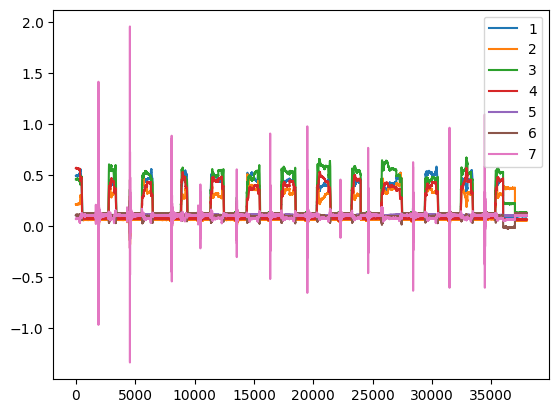

In [46]:
import matplotlib.pyplot as plt
plt.plot(megarray)
plt.legend([1,2,3,4,5,6,7])
plt.show()

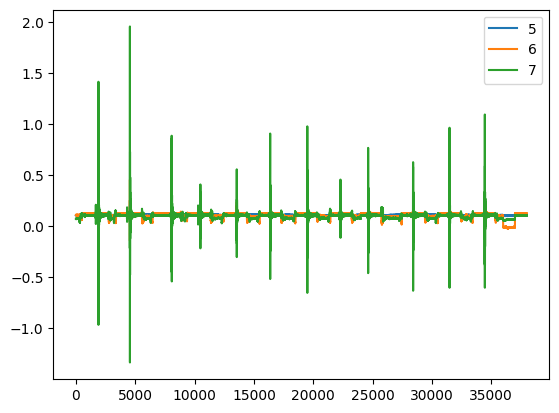

In [47]:
import matplotlib.pyplot as plt
plt.plot(megarray[:, -3:])
plt.legend([5,6,7])
plt.show()

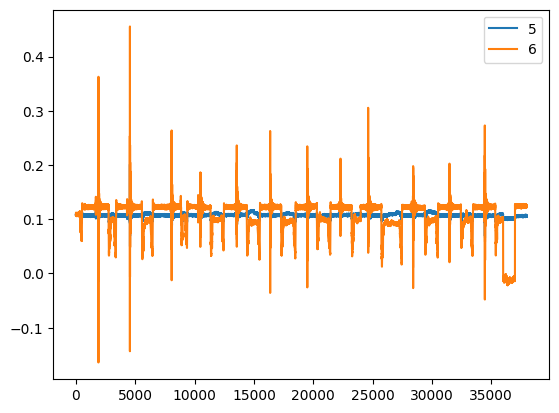

In [48]:
import matplotlib.pyplot as plt
plt.plot(megarray[:, -3:-1])
plt.legend([5,6])
plt.show()

(3000, 10)
(3000, 10)
(3000, 10)
(3000, 3, 10)
(3000,)


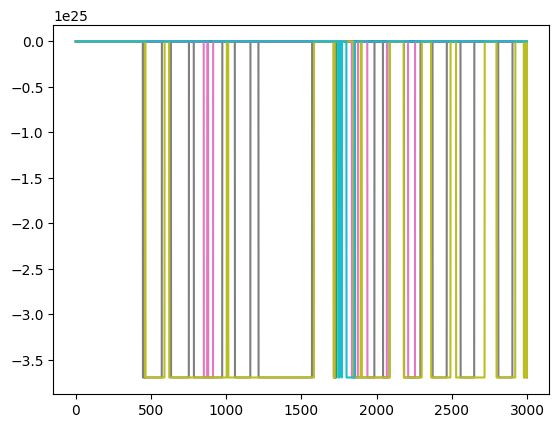

In [49]:
from hms_dualbelt import readndf

x,y,z,data,idx_good = readndf('./mhm_2024/TN000004.ndf') # note the unit (meters) of the output data

print(x.shape)
print(y.shape)
print(z.shape)
print(data.shape)
print(idx_good.shape)

plt.plot(z)
plt.show()

There are indices (time) at which the z (vertical direction) data is not valid.

In [50]:
z[500]

array([ 5.9361744e-01,  5.8297622e-01,  5.5205196e-01,  1.7025128e-01,
        1.3234113e-01,  1.6881800e-01,  1.1557770e+00, -3.6973141e+25,
       -3.6973141e+25,  1.5017606e+00], dtype=float32)

So we can discard the data where the value is less than -10^25.

In [51]:
data[data<-10**25]=np.nan
data[500,2,:]

array([0.59361744, 0.5829762 , 0.55205196, 0.17025128, 0.13234113,
       0.168818  , 1.155777  ,        nan,        nan, 1.5017606 ],
      dtype=float32)

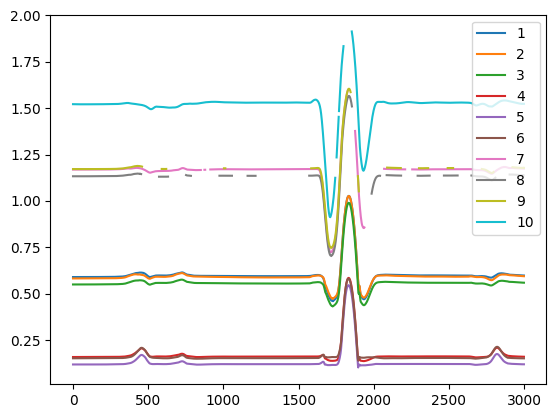

In [52]:
plt.plot(data[:,2,:])
plt.legend([1,2,3,4,5,6,7,8,9,10])
plt.show()

There are three triples of markers on the subject: 1-3 for ankle, 4-6 for knee, 7-9 for waist, and 10 for shoulder. 
The missing data is generated using natural cubic spline interpolation.


In [53]:
from scipy.interpolate import CubicSpline, interp1d

def interpolate_channel(channel):
    indices = np.arange(len(channel))
    not_nan_indices = np.where(~np.isnan(channel))[0]
    cs = CubicSpline(not_nan_indices, channel[not_nan_indices], bc_type='natural')
    interpolated_values = cs(indices)
    return interpolated_values

def readndf_z_com(filepath):
    _,_,z,_,_ = readndf(filepath)
    z[z < -10**25] = np.nan
    z[:,0] = np.mean(z[:,0:3], axis=1)
    z[:,1] = np.mean(z[:,3:6], axis=1)
    z[:,2] = np.mean(z[:,6:9], axis=1)
    z[:,3] = z[:,9]
    z = z[:,0:4]
    return np.apply_along_axis(interpolate_channel, axis=0, arr=z)

What does the raw data look like?

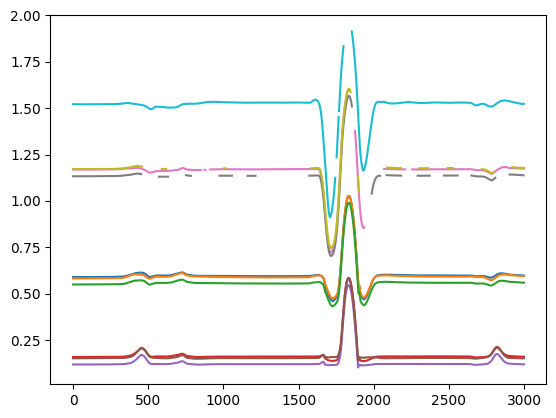

In [54]:
_,_,z,_,_ = readndf('./mhm_2024/TN000004.ndf')
z[z <-10**25]=np.nan
plt.plot(z)
plt.show()

What does the processed data look like?

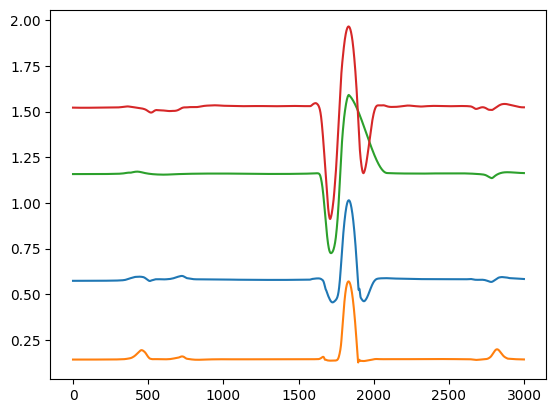

In [55]:
z = readndf_z_com('./mhm_2024/TN000004.ndf')
plt.plot(z)
plt.show()

Good interpolation given that there is much data missing for the waist (green line) during and after the jump.

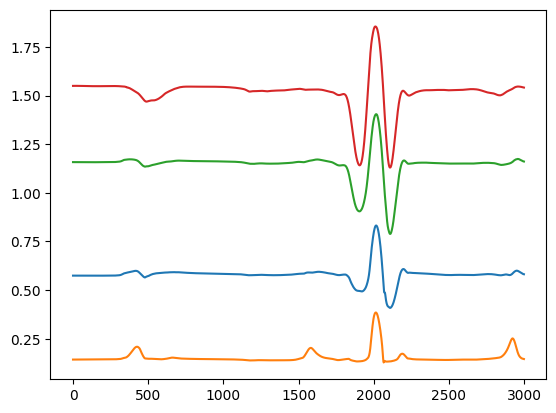

In [56]:
z = readndf_z_com('./mhm_2024/TN000006.ndf') # note the unit (meters) of the output data
plt.plot(z)
plt.show()

Good interpolation!

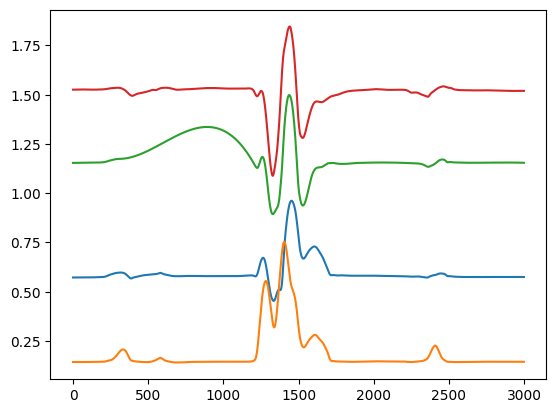

In [57]:
z = readndf_z_com('./mhm_2024/TN000007.ndf') # note the unit (meters) of the output data
plt.plot(z)
plt.show()

Small jump (hupje) before the actual jump!

Bad interpolation! There should not be a curved green line before the jump.

There is much data missing for the waist (green line) before the jump.

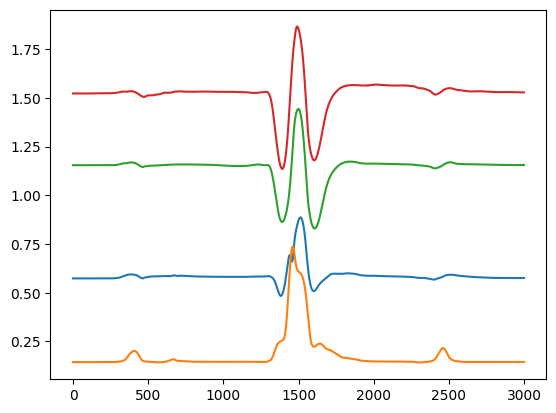

In [58]:
z = readndf_z_com('./mhm_2024/TN000008.ndf') # note the unit (meters) of the output data
plt.plot(z)
plt.show()

Good interpolation! However, the ankle max height looks like it happened too early. 

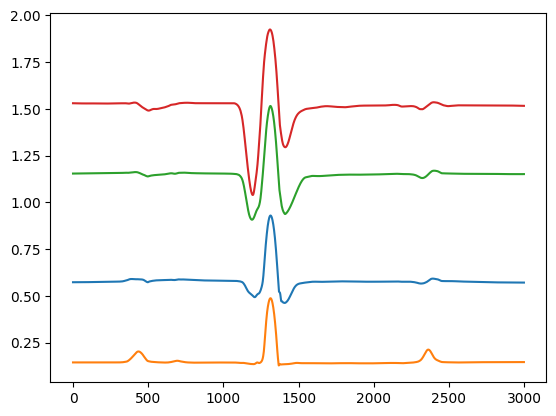

In [59]:
z = readndf_z_com('./mhm_2024/TN000009.ndf') # note the unit (meters) of the output data
plt.plot(z)
plt.show()

Good interpolation!

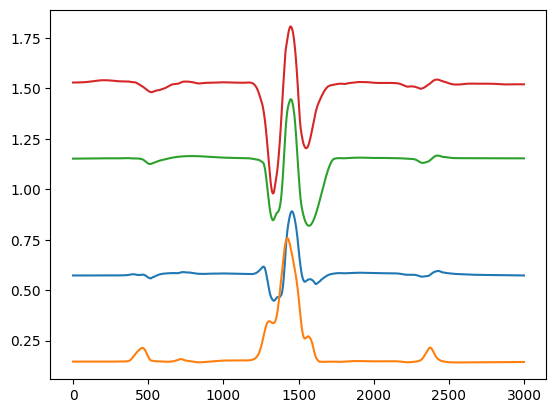

In [60]:
z = readndf_z_com('./mhm_2024/TN000011.ndf') # note the unit (meters) of the output data
plt.plot(z)
plt.show()

Good interpolation! However, the ankle max height looks like it happened too early. 

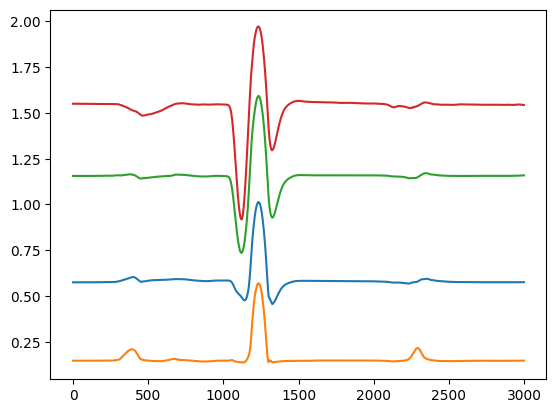

In [61]:
z = readndf_z_com('./mhm_2024/TN000013.ndf') # note the unit (meters) of the output data
plt.plot(z)
plt.show()

Good interpolation!

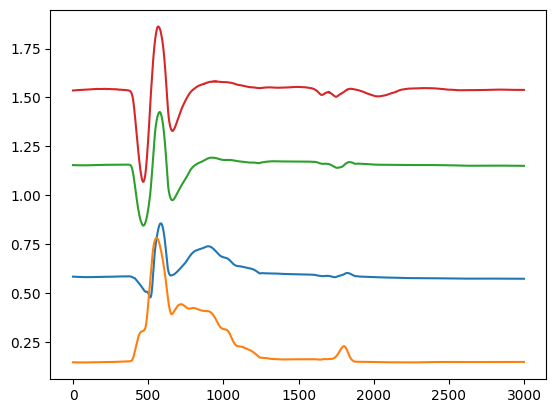

In [62]:
z = readndf_z_com('./mhm_2024/TN000015.ndf') # note the unit (meters) of the output data
plt.plot(z)
plt.show()

Good interpolation! However, the ankle max height looks like it happened too early. 

There was too little data of the subject standing still before the jump.

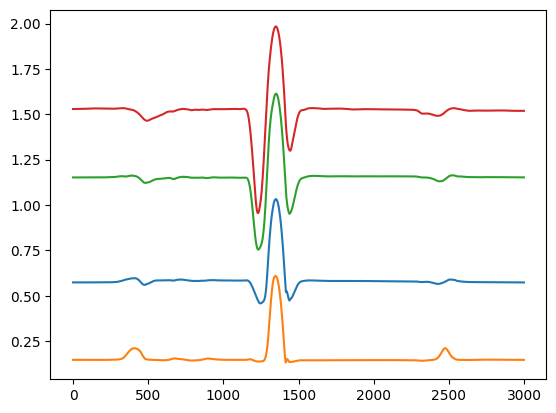

In [63]:
z = readndf_z_com('./mhm_2024/TN000016.ndf') # note the unit (meters) of the output data
plt.plot(z)
plt.show()

Good interpolation!

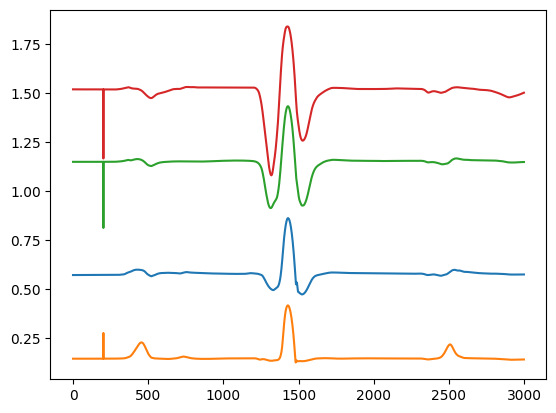

In [64]:
z = readndf_z_com('./mhm_2024/TN000017.ndf') # note the unit (meters) of the output data
plt.plot(z)
plt.show()

Good interpolation apart from the spikes near index 200. 

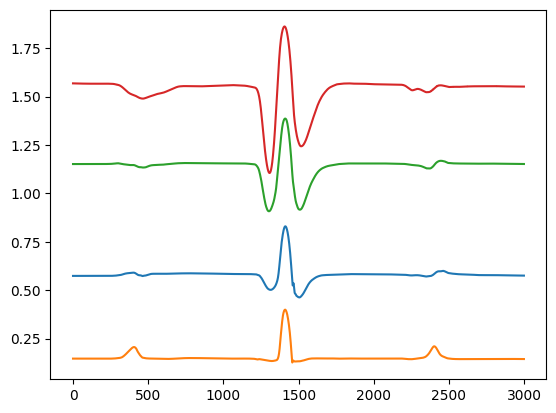

In [65]:
z = readndf_z_com('./mhm_2024/TN000018.ndf') # note the unit (meters) of the output data
plt.plot(z)
plt.show()

Good interpolation!

Average mass of body part and center of mass
According to Plagenhoef et al., 1983 (https://doi.org/10.1080/02701367.1983.10605290) we have tables with total weight per body part. From these tables, we can find the following data: 
|body part |relative mass(%total mass)|COM(%length)| 
|----------|--------------------------|------------|
|upper body|         69.13            |   60.439   |
|upper leg |         10.5             |   43.3     |
|lower leg |         4.75             |   43.4     |
|Foot      |         1.43             |   50       |

Note that we have a total % of body mass we accounted for is 85.81% 

We start with 2 assumptions: first that the entire upper body (head+arms+trunk) is one giant static blob (which it is certainly not) and secondly that our feet will be 2cm below our ankle point. We also assume that our test persons body is similar to the averages that we use. 

In [66]:
def find_com_coord(data):
    """Finds the total centre of mass
    :data: is assumed to be a list with shape [datapoints, 4]
    :result: is a list of COM coordinates of shape [datapoints, 1]"""
    result = []
    for point in data: # trackers are: 0: knee, 1: ankle, 2: hip, 3: shoulder
        chest = point[3] - point[2]  # chest
        up_leg = point[2] - point[0]  # upper leg
        lower_leg = point[0] - point[1] # lower leg
        foot = point[0]-0.02  # Assuming meters unit. needs to be point - 2 centimeters
          
        chest_com = chest* 0.60439 + point[2]
        up_leg_com = up_leg*0.433 + point[1]
        lower_leg_com = lower_leg*0.434 + point[0]
        foot_com = foot*0.5
            
        total_percentage = 85.81
        total_com = chest_com*(69.13/total_percentage)+up_leg_com*(10.5/total_percentage) + lower_leg_com*(4.75/total_percentage)+foot_com*(1.45/total_percentage)
        result.append(total_com)
    return result
    
def least_deviation(data:list)-> (int, float, float):
    """Checks a rolling average of 400 data points and returns the area with the least deviation from the point, its average value"""
    result_index = -1
    result_avg = -1.0
    result_std = np.Infinity
    
    for i in range(len(data)-400):
        std = np.std(data[i:i+400])
        if std<result_std:
            result_index = i
            result_avg = np.average(data[i:i+400])
            result_std = std
    return result_index, result_avg, result_std

def jump_height(data:list, toPrint = True):
    index, begin, std = least_deviation(data)
    darray = np.array(data)
    maxheight= darray.max()
    minheight = darray.min()
    jumpheight = maxheight-begin
    if toPrint:
        print(f"Jump height (max-neutral): {jumpheight} \nmax height: {maxheight} \nneutral standing height: {begin}\n    at point: {index}\n    with st. deviation: {std}\nLowest point: {minheight}" )
    return jumpheight
    
    
    

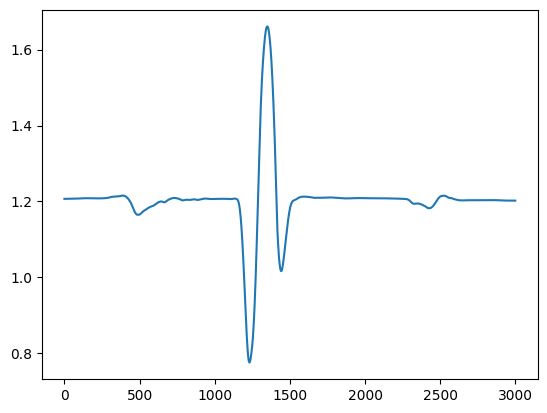

Jump height (max-neutral): 0.4529339037765787 
max height: 1.661146801299531 
neutral standing height: 1.2082128975229522
    at point: 1821
    with st. deviation: 0.0004197814871196069
Lowest point: 0.7753282595051859


0.4529339037765787

In [67]:
z = readndf_z_com('./mhm_2024/TN000016.ndf')
com = find_com_coord(z)
plt.plot(com)
plt.show()
jump_height(com)
# print(f"jumpheight: {jump_height(com)}")

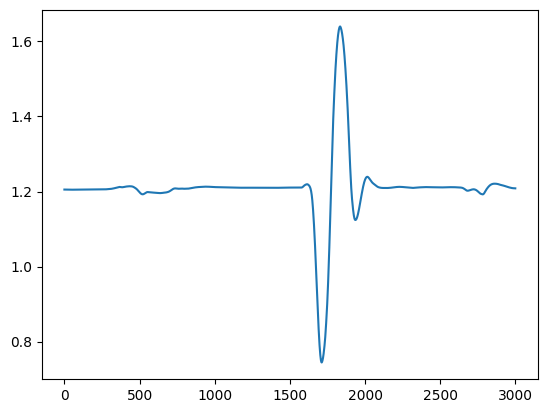

Jump height (max-neutral): 0.4297939321050246 
max height: 1.639857101725508 
neutral standing height: 1.2100631696204833
    at point: 1100
    with st. deviation: 0.00026141288052767485
Lowest point: 0.7444431618501174


0.4297939321050246

In [68]:
z = readndf_z_com('./mhm_2024/TN000004.ndf')
com = find_com_coord(z)
plt.plot(com)
plt.show()
jump_height(com)

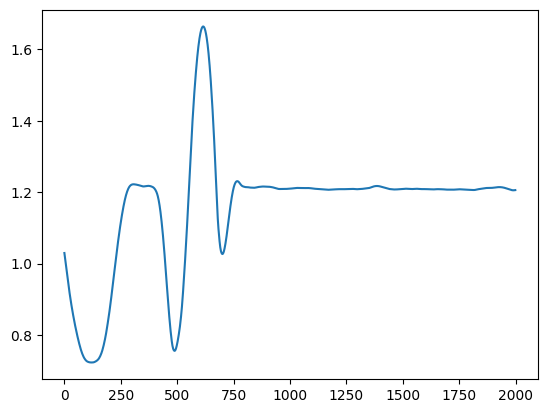

Jump height (max-neutral): 0.4559743645067298 
max height: 1.663991526102721 
neutral standing height: 1.2080171615959912
    at point: 1441
    with st. deviation: 0.0008728603010173724
Lowest point: 0.7231689519049835


0.4559743645067298

In [69]:
z = readndf_z_com('./mhm_2024/TN000002.ndf')
com = find_com_coord(z)
plt.plot(com)
plt.show()
jump_height(com)

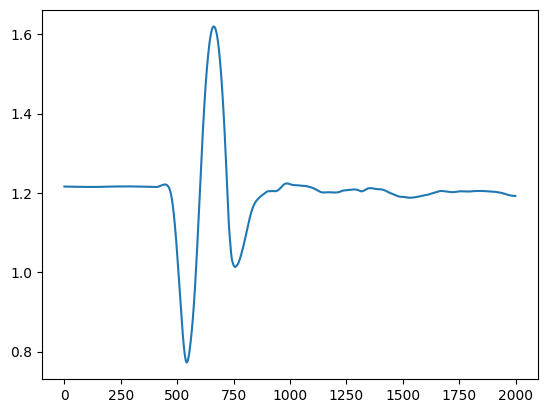

Jump height (max-neutral): 0.4040047447873347 
max height: 1.6197259145122127 
neutral standing height: 1.215721169724878
    at point: 0
    with st. deviation: 0.00048031079581652765
Lowest point: 0.7723777151916367


0.4040047447873347

In [70]:
z = readndf_z_com('./mhm_2024/TN000003.ndf')
com = find_com_coord(z)
plt.plot(com)
plt.show()
jump_height(com)

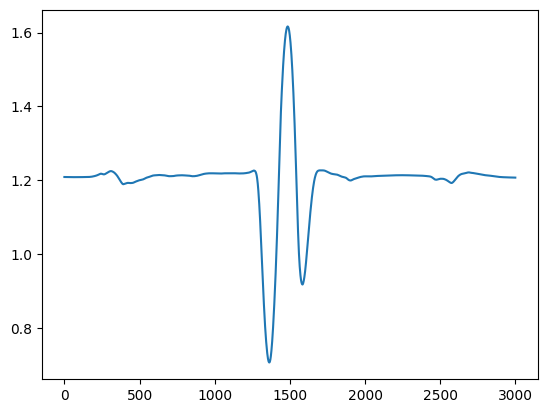

Jump height (max-neutral): 0.40414505834126313 
max height: 1.6167385355767725 
neutral standing height: 1.2125934772355094
    at point: 2031
    with st. deviation: 0.0009530039350421346
Lowest point: 0.7063333283553717


0.40414505834126313

In [71]:
z = readndf_z_com('./mhm_2024/TN000005.ndf')
com = find_com_coord(z)
plt.plot(com)
plt.show()
jump_height(com)

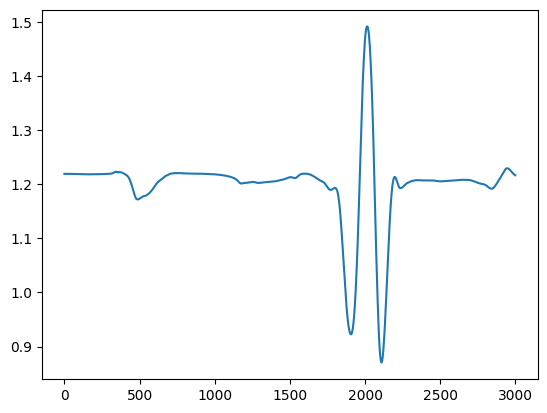

Jump height (max-neutral): 0.28450502319238935 
max height: 1.4911635376518833 
neutral standing height: 1.206658514459494
    at point: 2317
    with st. deviation: 0.0008351686730891381
Lowest point: 0.8704882278144249


0.28450502319238935

In [72]:
z = readndf_z_com('./mhm_2024/TN000006.ndf')
com = find_com_coord(z)
plt.plot(com)
plt.show()
jump_height(com)

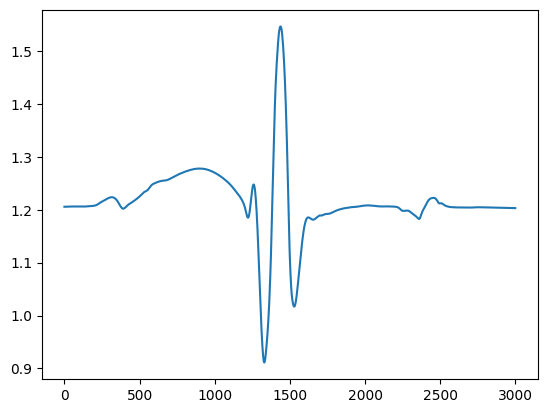

Jump height (max-neutral): 0.3422231188261009 
max height: 1.5463325244552457 
neutral standing height: 1.2041094056291448
    at point: 2567
    with st. deviation: 0.000463155551566727
Lowest point: 0.9112238488887026


0.3422231188261009

In [73]:
z = readndf_z_com('./mhm_2024/TN000007.ndf')
com = find_com_coord(z)
plt.plot(com)
plt.show()
jump_height(com)

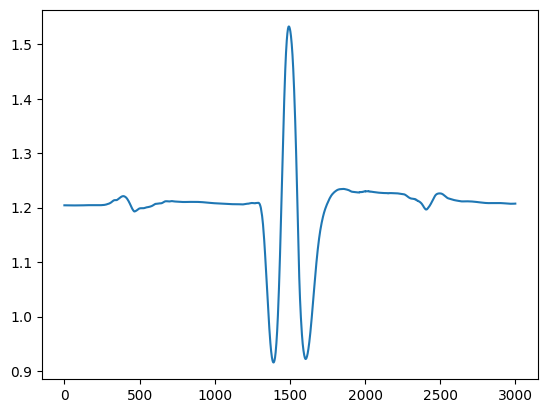

Jump height (max-neutral): 0.32524185362721303 
max height: 1.5329985883491308 
neutral standing height: 1.2077567347219178
    at point: 902
    with st. deviation: 0.0011883532694610137
Lowest point: 0.9155098852515656


0.32524185362721303

In [74]:
z = readndf_z_com('./mhm_2024/TN000008.ndf')
com = find_com_coord(z)
plt.plot(com)
plt.show()
jump_height(com)

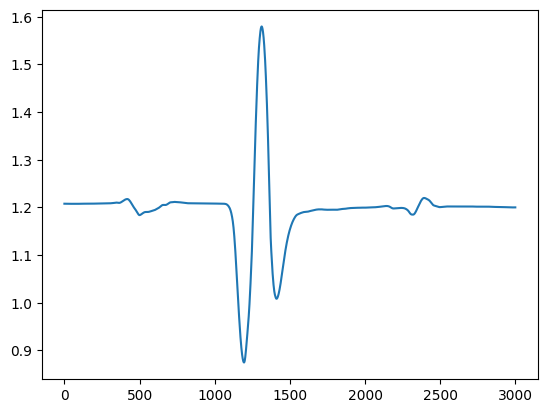

Jump height (max-neutral): 0.3780830929683061 
max height: 1.5797909676520927 
neutral standing height: 1.2017078746837866
    at point: 2475
    with st. deviation: 0.0003841509870562111
Lowest point: 0.8746367091340226


0.3780830929683061

In [75]:
z = readndf_z_com('./mhm_2024/TN000009.ndf')
com = find_com_coord(z)
plt.plot(com)
plt.show()
jump_height(com)

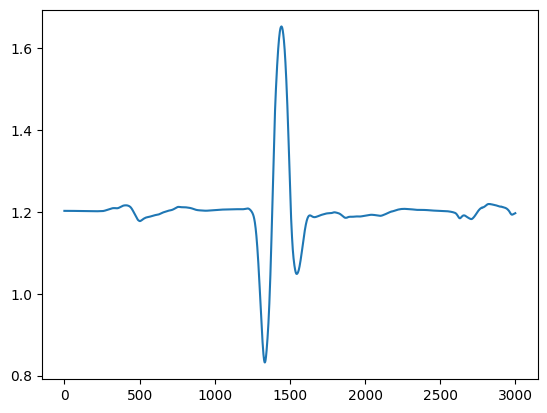

Jump height (max-neutral): 0.44737753381774326 
max height: 1.6526070799533887 
neutral standing height: 1.2052295461356455
    at point: 844
    with st. deviation: 0.0015626209937106535
Lowest point: 0.832097371689575


0.44737753381774326

In [76]:
z = readndf_z_com('./mhm_2024/TN000010.ndf')
com = find_com_coord(z)
plt.plot(com)
plt.show()
jump_height(com)

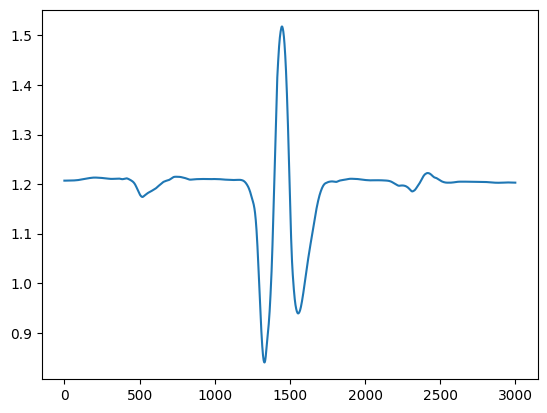

Jump height (max-neutral): 0.3141278997349515 
max height: 1.517974274328824 
neutral standing height: 1.2038463745938726
    at point: 2578
    with st. deviation: 0.0007827263670994351
Lowest point: 0.8400026435968088


0.3141278997349515

In [77]:
z = readndf_z_com('./mhm_2024/TN000011.ndf')
com = find_com_coord(z)
plt.plot(com)
plt.show()
jump_height(com)

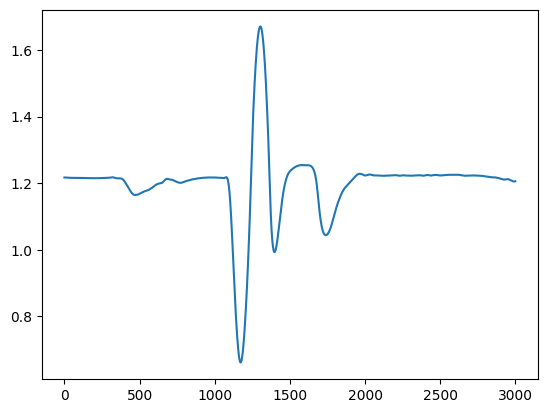

Jump height (max-neutral): 0.4474611194603981 
max height: 1.6705335869348703 
neutral standing height: 1.2230724674744722
    at point: 2051
    with st. deviation: 0.0005944502390723388
Lowest point: 0.6614747154818811


0.4474611194603981

In [78]:
z = readndf_z_com('./mhm_2024/TN000012.ndf')
com = find_com_coord(z)
plt.plot(com)
plt.show()
jump_height(com)

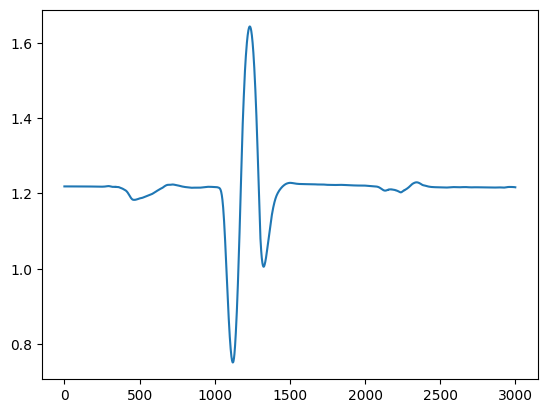

Jump height (max-neutral): 0.426889241077403 
max height: 1.6432301470399062 
neutral standing height: 1.2163409059625032
    at point: 2447
    with st. deviation: 0.0003968974502885017
Lowest point: 0.751398717662175


0.426889241077403

In [79]:
z = readndf_z_com('./mhm_2024/TN000013.ndf')
com = find_com_coord(z)
plt.plot(com)
plt.show()
jump_height(com)

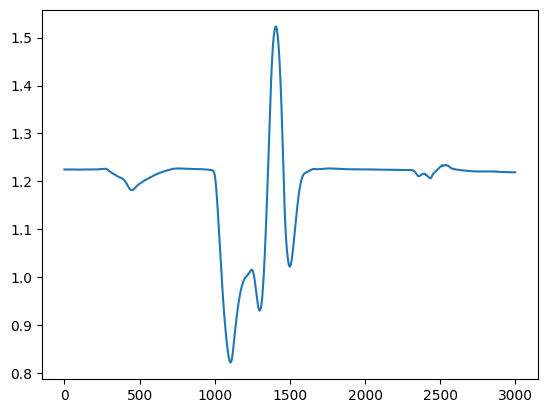

Jump height (max-neutral): 0.2985472383391281 
max height: 1.5231379970909582 
neutral standing height: 1.22459075875183
    at point: 1905
    with st. deviation: 0.0005264244250524612
Lowest point: 0.8222279516980127


0.2985472383391281

In [80]:
z = readndf_z_com('./mhm_2024/TN000014.ndf')
com = find_com_coord(z)
plt.plot(com)
plt.show()
jump_height(com)

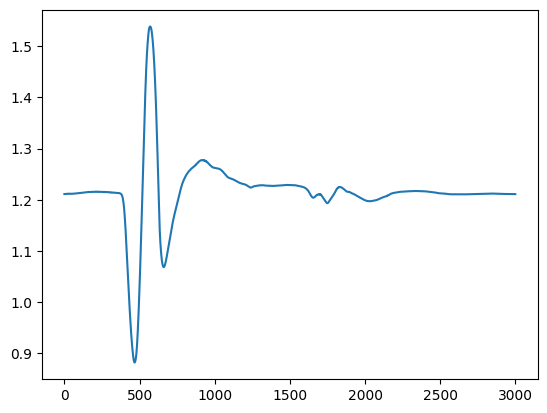

Jump height (max-neutral): 0.3273243027254793 
max height: 1.538605777708839 
neutral standing height: 1.2112814749833598
    at point: 2599
    with st. deviation: 0.0004920624863600231
Lowest point: 0.8820738559957478


0.3273243027254793

In [81]:
z = readndf_z_com('./mhm_2024/TN000015.ndf')
com = find_com_coord(z)
plt.plot(com)
plt.show()
jump_height(com)

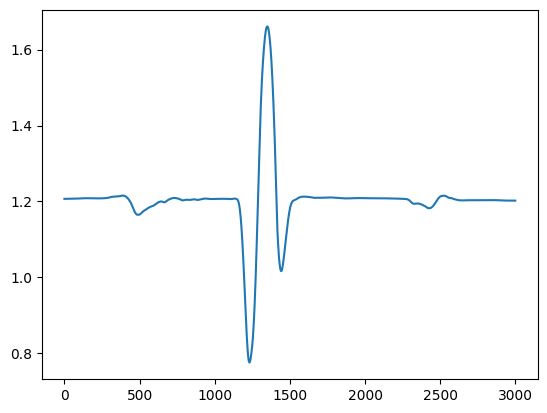

Jump height (max-neutral): 0.4529339037765787 
max height: 1.661146801299531 
neutral standing height: 1.2082128975229522
    at point: 1821
    with st. deviation: 0.0004197814871196069
Lowest point: 0.7753282595051859


0.4529339037765787

In [82]:
z = readndf_z_com('./mhm_2024/TN000016.ndf')
com = find_com_coord(z)
plt.plot(com)
plt.show()
jump_height(com)

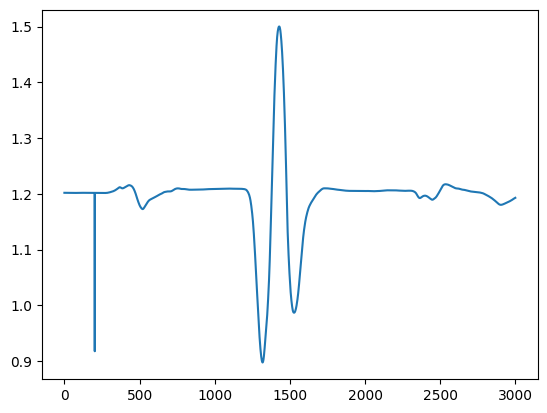

Jump height (max-neutral): 0.2947144860198905 
max height: 1.5001787641067175 
neutral standing height: 1.205464278086827
    at point: 1880
    with st. deviation: 0.0005027463030544221
Lowest point: 0.8976190446364479


0.2947144860198905

In [83]:
z = readndf_z_com('./mhm_2024/TN000017.ndf')
com = find_com_coord(z)
plt.plot(com)
plt.show()
jump_height(com)

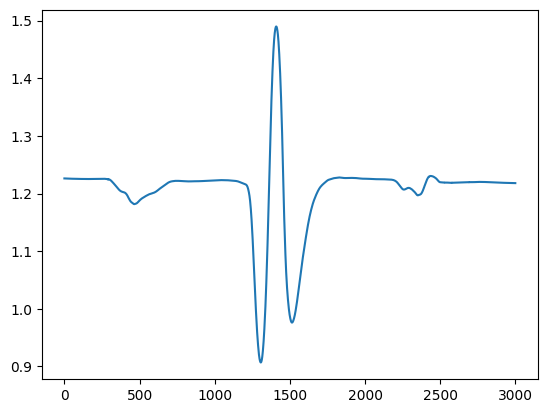

Jump height (max-neutral): 0.27046417519418187 
max height: 1.4899286805053953 
neutral standing height: 1.2194645053112134
    at point: 2495
    with st. deviation: 0.00045110093583144257
Lowest point: 0.9067801102217657


0.27046417519418187

In [84]:
z = readndf_z_com('./mhm_2024/TN000018.ndf')
com = find_com_coord(z)
plt.plot(com)
plt.show()
jump_height(com)

In [86]:
datapaths_set1=["./mhm_2024/TN000004.ndf","./mhm_2024/TN000005.ndf","./mhm_2024/TN000006.ndf","./mhm_2024/TN000007.ndf","./mhm_2024/TN000008.ndf","./mhm_2024/TN000009.ndf",]
datapaths_set2=["./mhm_2024/TN000011.ndf","./mhm_2024/TN000013.ndf","./mhm_2024/TN000015.ndf","./mhm_2024/TN000016.ndf","./mhm_2024/TN000017.ndf","./mhm_2024/TN000018.ndf",]

heights1 = []
for path in datapaths_set1:
    z = readndf_z_com(path)
    com = find_com_coord(z)
    height = jump_height(com, False)
    heights1.append(height)

heights2 = []
for path in datapaths_set2:
    z = readndf_z_com(path)
    com = find_com_coord(z)
    height = jump_height(com, False)
    heights2.append(height)
    
print('|    jump type    |set 1(m)|set 2(m)|')
print('|-----------------|--------|--------|')
print(f'| free-both-legs  | {heights1[0]:.4f} | {heights2[3]:.4f} |')
print(f'| free-jump-right | {heights1[3]:.4f} | {heights2[0]:.4f} |')
print(f'| free-jump-left  | {heights1[5]:.4f} | {heights2[4]:.4f} |')
print(f'| crossed-both-legs  | {heights1[1]:.4f} | {heights2[1]:.4f} |')
print(f'| crossed-jump-right | {heights1[4]:.4f} | {heights2[2]:.4f} |')
print(f'| crossed-left-leg   | {heights1[2]:.4f} | {heights2[5]:.4f} |')

    

|    jump type    |set 1(m)|set 2(m)|
|-----------------|--------|--------|
| free-both-legs  | 0.4298 | 0.4529 |
| free-jump-right | 0.3422 | 0.3141 |
| free-jump-left  | 0.3781 | 0.2947 |
| crossed-both-legs  | 0.4041 | 0.4269 |
| crossed-jump-right | 0.3252 | 0.3273 |
| crossed-left-leg   | 0.2845 | 0.2705 |
